C:\Users\new user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.sparse import csr_matrix, issparse
C:\Users\new user\AppData\Local\Temp\ipykernel_33332\3310299494.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
C:\Users\new user\AppData\Local\Temp\ipykernel_33332\3310299494.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\new user\AppData\Local\Temp\ipykernel_33332\3310299494.py:55: FutureWarning: The 'delim_whitespace' keyword 

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))
=== K-Nearest Neighbors Classification ===
training the model..
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Done....!

==> training time:- 0:00:26.170542

Predicting test data
Done....!

==> testing time:- 0:00:01.241219

==> Accuracy:- 0.9195792331184255


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  1 405  83   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 487   5   4]
 [  0   0   0  37 330  53]
 [  0   0   0  38   2 431]]


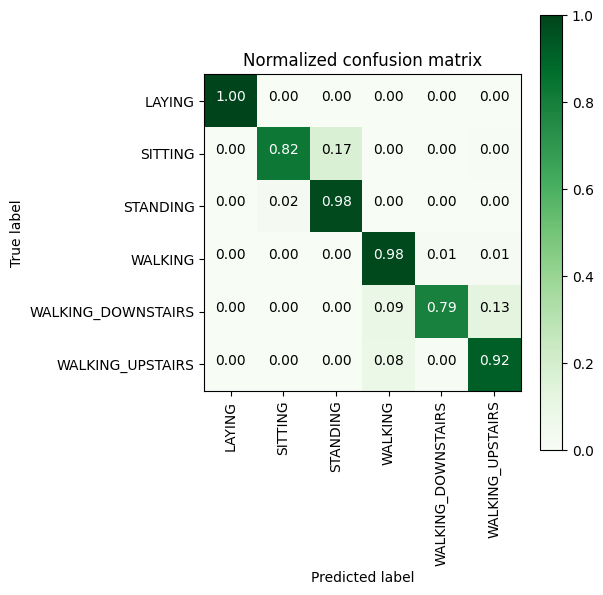

****************| Classification Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.82      0.89       491
          STANDING       0.86      0.98      0.92       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.98      0.79      0.87       420
  WALKING_UPSTAIRS       0.88      0.92      0.90       471

          accuracy                           0.92      2947
         macro avg       0.93      0.91      0.92      2947
      weighted avg       0.93      0.92      0.92      2947



==> Best Estimator:
	KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')


==> Best parameters:
	Parameters of best estimator : {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

==> No. of CrossValidation sets:
	Total number of cross validation sets: 5

==> Best Score:
	Average Cross Validate s

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load and prepare data (same as your RF code)
# --- 1. Load Feature Names ---
try:
    features_df = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
    feature_names = features_df[1].tolist()
except FileNotFoundError:
    print("Error: 'features.txt' not found. Make sure it's in the 'UCI HAR Dataset' folder.")
    feature_names = []

# --- 2. Load Training Data (X_train) ---
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Set the column names
if feature_names:
    X_train.columns = feature_names
else:
    print("Warning: Feature names not loaded. Columns will be numbered.")

# --- 3. Load Subject Data ---
subject_series = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None)[0]

# --- 4. Load Activity Labels (y_train) ---
y_train_series = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])['Activity']

# --- 5. Combine All Data into One DataFrame ---
train = X_train.copy()

# Add the new columns
train['subject'] = subject_series
train['Activity'] = y_train_series

# --- 6. Map Activity Names ---
activity_map = {
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING', 
    5: 'STANDING',
    6: 'LAYING'
}

train['ActivityName'] = train['Activity'].map(activity_map)

# --- Load Test Data ---
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Set the column names
if 'feature_names' in locals():
    X_test.columns = feature_names
else:
    print("Warning: 'feature_names' not found. Columns will be numbered.")

# Load Subject Data for test
subject_series_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None)[0]

# Load Activity Labels for test
y_test_series = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])['Activity']

# Combine All Test Data into One DataFrame
test = X_test.copy()

# Add the new columns
test['subject'] = subject_series_test
test['Activity'] = y_test_series
test['ActivityName'] = test['Activity'].map(activity_map)

# Prepare features and labels for modeling
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

# Labels that are useful in plotting confusion matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Confusion matrix plotting function (same as your RF code)
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model performance evaluation function (same as your RF code)
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, 
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusion matrix
    plt.figure(figsize=(6,6))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap=cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classification Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results

# Grid search attributes function (same as your RF code)
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))

    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))

    # number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal number of cross validation sets: {}'.format(model.n_splits_))

    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

# KNN Grid Search and Evaluation
print("=== K-Nearest Neighbors Classification ===")

# Define parameter grid for KNN
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
knn_grid = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1, verbose=1)
knn_grid_results = perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model 
print_grid_search_attributes(knn_grid_results['model'])

# Feature selection experiment for KNN (optional)
print("\n=== Feature Selection Experiment for KNN ===")
print("Running feature selection experiment...")

# You can add feature selection code here if needed
# This would be similar to your RF feature selection experiment

Running GridSearchCV for PCA + KNN...
Training the KNN model..
Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\new user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.85310275 0.85446301 0.86344    0.86411993 0.86888112 0.86874501
 0.87010516 0.86996916 0.87024133 0.87105738        nan 0.85378119
        nan 0.85990258        nan 0.86806479        nan 0.87132871
        nan 0.87105666]
  warnings.warn(


Done....!

==> Training time:- 0:00:18.583953

Predicting test data
Done....!

==> Testing time:- 0:00:00.211645

==> Accuracy:- 0.8737699355276553


 ********Confusion Matrix********

 [[503  17  17   0   0   0]
 [  2 353 134   0   0   2]
 [  0  30 502   0   0   0]
 [  0   0   0 490   5   1]
 [  0   0   0  61 300  59]
 [  0   0   0  39   5 427]]


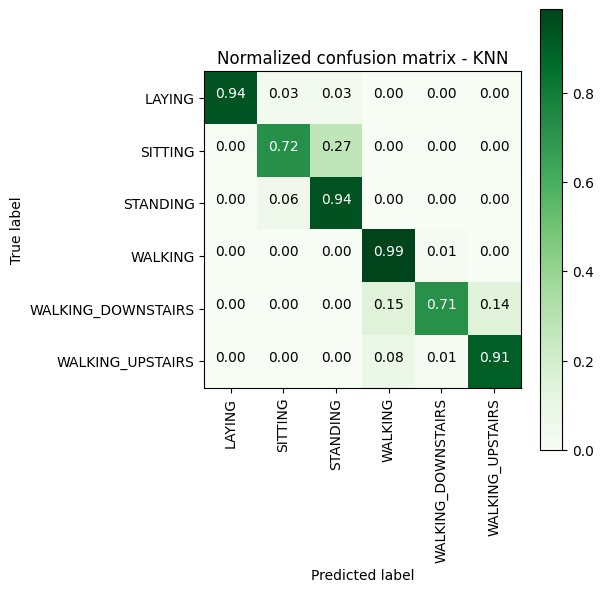

****************| Classification Report - KNN |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.94      0.97       537
           SITTING       0.88      0.72      0.79       491
          STANDING       0.77      0.94      0.85       532
           WALKING       0.83      0.99      0.90       496
WALKING_DOWNSTAIRS       0.97      0.71      0.82       420
  WALKING_UPSTAIRS       0.87      0.91      0.89       471

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947



==> Best Estimator:
	Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_red', PCA(n_components=0.95)),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])


==> Best parameters:
	Parameters of best estimato

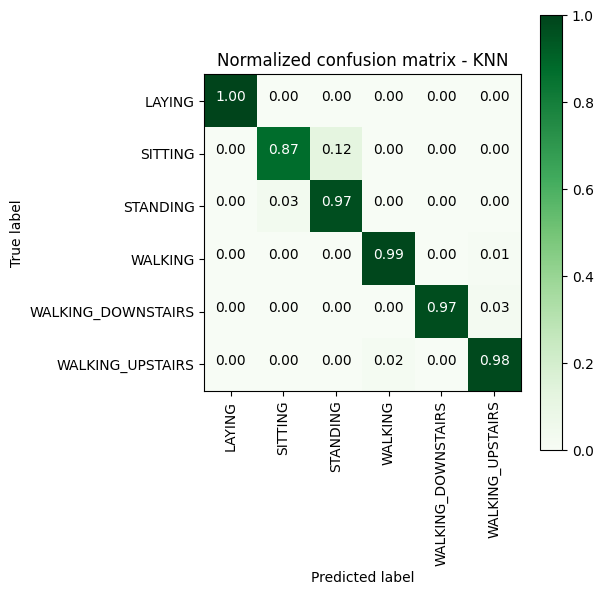

****************| Classification Report - KNN |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.98      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.96      0.98      0.97       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



==> Best Estimator:
	Pipeline(steps=[('scaler', StandardScaler()),
                ('dim_red', LinearDiscriminantAnalysis(n_components=5)),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])


==> Best parameters:
	Paramet

In [2]:
# Add this cell after your existing imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# --- KNN Implementation ---
def perform_knn_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, 
                     print_cm=True, cm_cmap=plt.cm.Greens):
    """
    Perform KNN model training and evaluation
    """
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('Training the KNN model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> Training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> Testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusion matrix
    plt.figure(figsize=(6,6))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, 
                         title='Normalized confusion matrix - KNN', cmap=cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classification Report - KNN |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results

# --- KNN with PCA ---
print("Running GridSearchCV for PCA + KNN...")

# Define KNN parameters for grid search
knn_parameters = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Create PCA pipeline for KNN
pca_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', PCA(n_components=0.95)),
    ('model', KNeighborsClassifier())
])

# Setup GridSearchCV for KNN
knn_grid_pca = GridSearchCV(
    pca_knn_pipeline,
    param_grid=knn_parameters,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run KNN model with PCA
knn_grid_pca_results = perform_knn_model(
    knn_grid_pca, 
    X_train, y_train, X_test, y_test, 
    class_labels=labels
)

print_grid_search_attributes(knn_grid_pca_results['model'])

# --- KNN with LDA ---
print("\nRunning GridSearchCV for LDA + KNN...")

# Create LDA pipeline for KNN
lda_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', LDA(n_components=5)),  # LDA for dimensionality reduction
    ('model', KNeighborsClassifier())
])

# Setup GridSearchCV for LDA + KNN
knn_grid_lda = GridSearchCV(
    lda_knn_pipeline,
    param_grid=knn_parameters,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run LDA + KNN model
knn_grid_lda_results = perform_knn_model(
    knn_grid_lda, 
    X_train, y_train, X_test, y_test, 
    class_labels=labels
)

print_grid_search_attributes(knn_grid_lda_results['model'])

# --- KNN Comparison ---
print("\n" + "="*50)
print("KNN MODEL COMPARISON")
print("="*50)
print(f"KNN with PCA:    {knn_grid_pca_results['accuracy']:.4f}")
print(f"KNN with LDA:    {knn_grid_lda_results['accuracy']:.4f}")

# Extract best parameters for comparison
pca_best_params = knn_grid_pca_results['model'].best_params_
lda_best_params = knn_grid_lda_results['model'].best_params_

print("\nBest Parameters:")
print(f"PCA + KNN: {pca_best_params}")
print(f"LDA + KNN: {lda_best_params}")

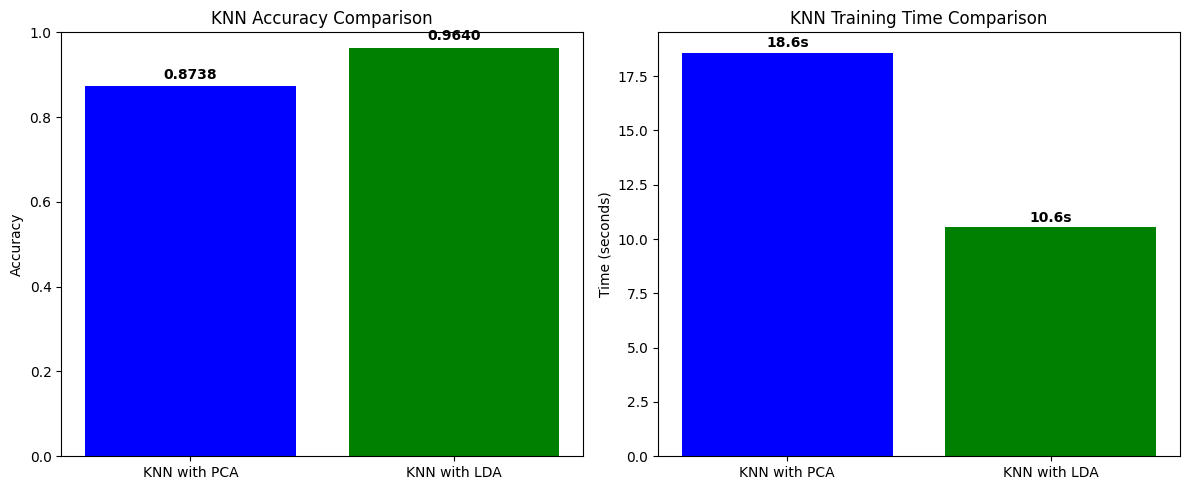


DETAILED KNN COMPARISON
Model           | Accuracy | Training Time | Best Parameters
------------------------------------------------------------
KNN + PCA       | 0.8738   | 18.6        s | k=9, weights=distance, metric=manhattan
KNN + LDA       | 0.9640   | 10.6        s | k=9, weights=distance, metric=manhattan

🏆 Best performing KNN model: KNN with LDA


In [3]:
# --- KNN Comparison Visualization ---
knn_models = ['KNN with PCA', 'KNN with LDA']
knn_accuracies = [
    knn_grid_pca_results['accuracy'],
    knn_grid_lda_results['accuracy']
]

knn_training_times = [
    knn_grid_pca_results['training_time'].total_seconds(),
    knn_grid_lda_results['training_time'].total_seconds()
]

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
bars1 = ax1.bar(knn_models, knn_accuracies, color=['blue', 'green'])
ax1.set_title('KNN Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for bar, acc in zip(bars1, knn_accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Training time comparison  
bars2 = ax2.bar(knn_models, knn_training_times, color=['blue', 'green'])
ax2.set_title('KNN Training Time Comparison')
ax2.set_ylabel('Time (seconds)')
for bar, time in zip(bars2, knn_training_times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{time:.1f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed comparison
print("\n" + "="*60)
print("DETAILED KNN COMPARISON")
print("="*60)
print(f"{'Model':<15} | {'Accuracy':<8} | {'Training Time':<12} | Best Parameters")
print("-" * 60)

pca_params_str = f"k={pca_best_params['model__n_neighbors']}, weights={pca_best_params['model__weights']}, metric={pca_best_params['model__metric']}"
lda_params_str = f"k={lda_best_params['model__n_neighbors']}, weights={lda_best_params['model__weights']}, metric={lda_best_params['model__metric']}"

print(f"{'KNN + PCA':<15} | {knn_accuracies[0]:<8.4f} | {knn_training_times[0]:<12.1f}s | {pca_params_str}")
print(f"{'KNN + LDA':<15} | {knn_accuracies[1]:<8.4f} | {knn_training_times[1]:<12.1f}s | {lda_params_str}")

# Determine winner
if knn_accuracies[0] > knn_accuracies[1]:
    winner = "KNN with PCA"
elif knn_accuracies[1] > knn_accuracies[0]:
    winner = "KNN with LDA"
else:
    winner = "Both models performed equally"

print(f"\n🏆 Best performing KNN model: {winner}")
print("="*60)


SIDE-BY-SIDE CONFUSION MATRIX COMPARISON - KNN MODELS


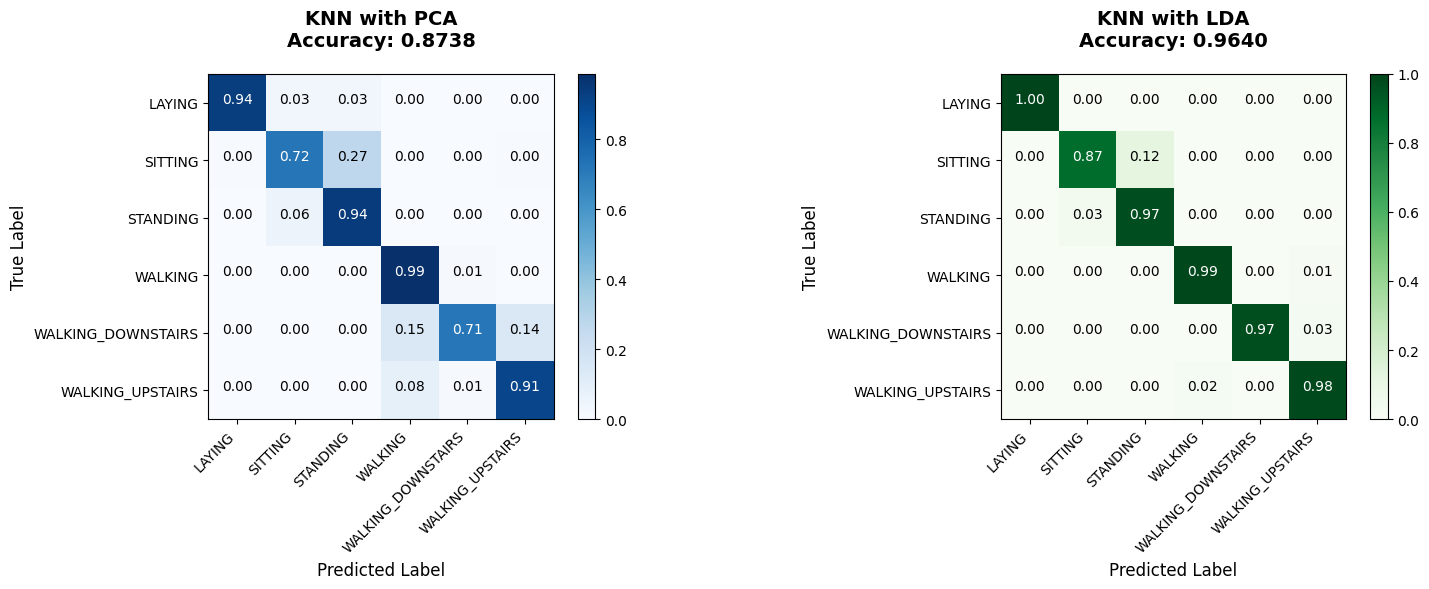


CLASS-WISE PERFORMANCE COMPARISON
Class                | PCA Precision PCA Recall   PCA F1       | LDA Precision LDA Recall   LDA F1      
--------------------------------------------------------------------------------------------------------------
LAYING               | 0.9960       0.9367       0.9655       | 1.0000       1.0000       1.0000      
SITTING              | 0.8825       0.7189       0.7924       | 0.9597       0.8737       0.9147      
STANDING             | 0.7688       0.9436       0.8473       | 0.8939       0.9662       0.9286      
WALKING              | 0.8305       0.9879       0.9024       | 0.9820       0.9879       0.9849      
WALKING_DOWNSTAIRS   | 0.9677       0.7143       0.8219       | 1.0000       0.9714       0.9855      
WALKING_UPSTAIRS     | 0.8732       0.9066       0.8896       | 0.9626       0.9830       0.9727      
--------------------------------------------------------------------------------------------------------------
AVERAGE             

In [4]:
# --- Side-by-Side Confusion Matrix Comparison ---
print("\n" + "="*70)
print("SIDE-BY-SIDE CONFUSION MATRIX COMPARISON - KNN MODELS")
print("="*70)

# Get confusion matrices
cm_pca = knn_grid_pca_results['confusion_matrix']
cm_lda = knn_grid_lda_results['confusion_matrix']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Normalize confusion matrices
cm_pca_normalized = cm_pca.astype('float') / cm_pca.sum(axis=1)[:, np.newaxis]
cm_lda_normalized = cm_lda.astype('float') / cm_lda.sum(axis=1)[:, np.newaxis]

# Plot PCA Confusion Matrix
im1 = ax1.imshow(cm_pca_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax1.set_title('KNN with PCA\nAccuracy: {:.4f}'.format(knn_grid_pca_results['accuracy']), 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Predicted Label', fontsize=12)
ax1.set_ylabel('True Label', fontsize=12)
tick_marks = np.arange(len(labels))
ax1.set_xticks(tick_marks)
ax1.set_yticks(tick_marks)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.set_yticklabels(labels)

# Add text annotations for PCA
thresh = cm_pca_normalized.max() / 2.
for i, j in itertools.product(range(cm_pca_normalized.shape[0]), range(cm_pca_normalized.shape[1])):
    ax1.text(j, i, format(cm_pca_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_pca_normalized[i, j] > thresh else "black",
             fontsize=10)

# Plot LDA Confusion Matrix
im2 = ax2.imshow(cm_lda_normalized, interpolation='nearest', cmap=plt.cm.Greens)
ax2.set_title('KNN with LDA\nAccuracy: {:.4f}'.format(knn_grid_lda_results['accuracy']), 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Predicted Label', fontsize=12)
ax2.set_ylabel('True Label', fontsize=12)
ax2.set_xticks(tick_marks)
ax2.set_yticks(tick_marks)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.set_yticklabels(labels)

# Add text annotations for LDA
thresh = cm_lda_normalized.max() / 2.
for i, j in itertools.product(range(cm_lda_normalized.shape[0]), range(cm_lda_normalized.shape[1])):
    ax2.text(j, i, format(cm_lda_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_lda_normalized[i, j] > thresh else "black",
             fontsize=10)

# Add colorbars
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# --- Detailed Class-wise Performance Comparison ---
print("\n" + "="*80)
print("CLASS-WISE PERFORMANCE COMPARISON")
print("="*80)

# Get classification reports
from sklearn.metrics import precision_recall_fscore_support

# Calculate metrics for both models
precision_pca, recall_pca, f1_pca, _ = precision_recall_fscore_support(y_test, knn_grid_pca_results['predicted'], average=None, labels=labels)
precision_lda, recall_lda, f1_lda, _ = precision_recall_fscore_support(y_test, knn_grid_lda_results['predicted'], average=None, labels=labels)

print(f"{'Class':<20} | {'PCA Precision':<12} {'PCA Recall':<12} {'PCA F1':<12} | {'LDA Precision':<12} {'LDA Recall':<12} {'LDA F1':<12}")
print("-" * 110)

for i, label in enumerate(labels):
    print(f"{label:<20} | {precision_pca[i]:<12.4f} {recall_pca[i]:<12.4f} {f1_pca[i]:<12.4f} | {precision_lda[i]:<12.4f} {recall_lda[i]:<12.4f} {f1_lda[i]:<12.4f}")

# Calculate average metrics
avg_precision_pca = precision_pca.mean()
avg_recall_pca = recall_pca.mean()
avg_f1_pca = f1_pca.mean()

avg_precision_lda = precision_lda.mean()
avg_recall_lda = recall_lda.mean()
avg_f1_lda = f1_lda.mean()

print("-" * 110)
print(f"{'AVERAGE':<20} | {avg_precision_pca:<12.4f} {avg_recall_pca:<12.4f} {avg_f1_pca:<12.4f} | {avg_precision_lda:<12.4f} {avg_recall_lda:<12.4f} {avg_f1_lda:<12.4f}")

# --- Misclassification Analysis ---
print("\n" + "="*60)
print("MISCLASSIFICATION ANALYSIS")
print("="*60)

# Find where models disagree
pca_pred = knn_grid_pca_results['predicted']
lda_pred = knn_grid_lda_results['predicted']

disagreement_mask = pca_pred != lda_pred
num_disagreements = disagreement_mask.sum()

print(f"Number of samples where models disagree: {num_disagreements}/{len(y_test)} ({num_disagreements/len(y_test)*100:.2f}%)")

if num_disagreements > 0:
    print("\nSamples where models disagreed:")
    disagreement_df = pd.DataFrame({
        'True_Label': y_test[disagreement_mask],
        'PCA_Prediction': pca_pred[disagreement_mask],
        'LDA_Prediction': lda_pred[disagreement_mask],
        'PCA_Correct': pca_pred[disagreement_mask] == y_test[disagreement_mask],
        'LDA_Correct': lda_pred[disagreement_mask] == y_test[disagreement_mask]
    })
    
    # Count correct predictions in disagreements
    pca_correct_in_disagreements = disagreement_df['PCA_Correct'].sum()
    lda_correct_in_disagreements = disagreement_df['LDA_Correct'].sum()
    
    print(f"PCA correct in disagreements: {pca_correct_in_disagreements}/{num_disagreements}")
    print(f"LDA correct in disagreements: {lda_correct_in_disagreements}/{num_disagreements}")
    
    # Show some examples of disagreements
    print("\nFirst 10 disagreement examples:")
    print(disagreement_df.head(10))

# --- Best Parameters Summary ---
print("\n" + "="*50)
print("BEST PARAMETERS SUMMARY")
print("="*50)

pca_best = knn_grid_pca_results['model'].best_params_
lda_best = knn_grid_lda_results['model'].best_params_

print("KNN with PCA - Best Parameters:")
print(f"  n_neighbors: {pca_best['model__n_neighbors']}")
print(f"  weights: {pca_best['model__weights']}")
print(f"  metric: {pca_best['model__metric']}")

print("\nKNN with LDA - Best Parameters:")
print(f"  n_neighbors: {lda_best['model__n_neighbors']}")
print(f"  weights: {lda_best['model__weights']}")
print(f"  metric: {lda_best['model__metric']}")

# Final recommendation
print("\n" + "="*70)
print("FINAL RECOMMENDATION")
print("="*70)

if knn_grid_pca_results['accuracy'] > knn_grid_lda_results['accuracy']:
    winner = "KNN with PCA"
    advantage = knn_grid_pca_results['accuracy'] - knn_grid_lda_results['accuracy']
elif knn_grid_lda_results['accuracy'] > knn_grid_pca_results['accuracy']:
    winner = "KNN with LDA"
    advantage = knn_grid_lda_results['accuracy'] - knn_grid_pca_results['accuracy']
else:
    winner = "Both models performed equally well"
    advantage = 0

print(f"🏆 Recommended Model: {winner}")
if advantage > 0:
    print(f"📈 Accuracy advantage: {advantage:.4f} ({advantage*100:.2f}%)")
print("="*70)